# Introduction

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products. Same is the case with each store.

The aim is to build a predictive model to find out the sales of each product at a particular store so that it would help the decision makers at BigMart to find out the properties of any product or store, which play a key role in increasing the overall sales.

_You can read the problem statement and download the datasets from this link:_ [Analytics Vidhya](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)

### 1. Exploratory Data Analysis

In this section, we will explore the data through visualization and other methods and make some inference about our data. Further, we will look out for any irreregularities in the dataset, so that we can correct them in the pre-processing stage. First, load libraries and read data from the file.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

train = pd.read_csv("Train.csv") 
test = pd.read_csv("Test.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


NOTE: Item_Outlet_Sales is present in train but not in test dataset because this is the target variable that we have to predict.

### 1.1 Univariate Analysis

#### 1.1.1 Distribution of the target variable : Item_Outlet_Sales

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

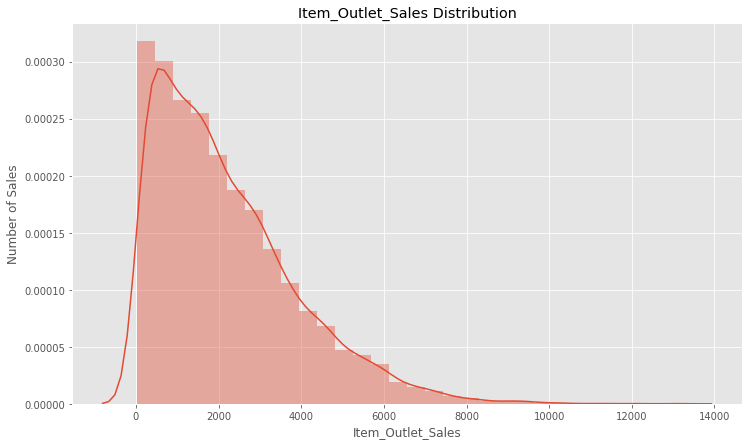

In [5]:
plt.style.use('ggplot')
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, bins = 30)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

#### 1.1.2 Distribution of the Item_Fat_Content

In [6]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

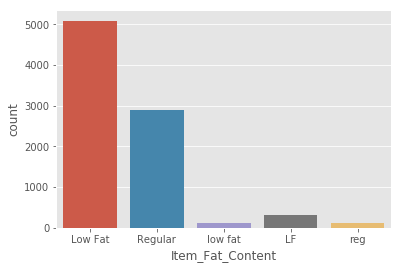

In [7]:
sns.countplot(train.Item_Fat_Content)

#### 1.1.3 Distribution of the Item_Type

In [8]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

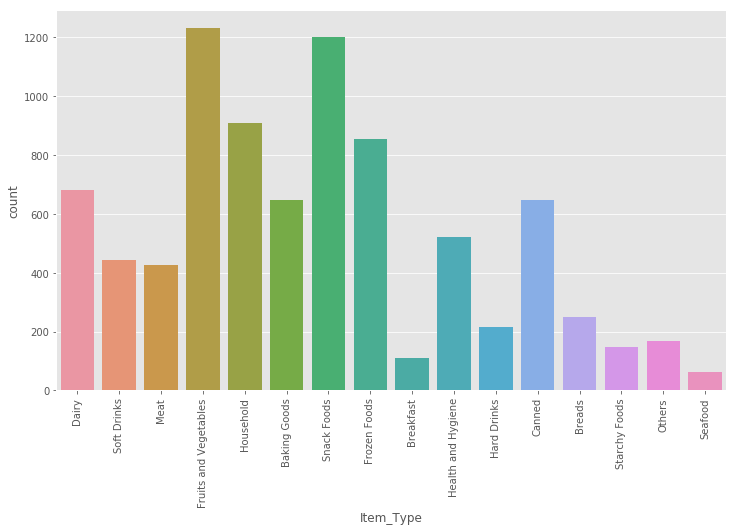

In [9]:
plt.figure(figsize=(12,7))
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

#### 1.1.4 Distribution of the Outlet_Size

In [10]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
train.Outlet_Size.isna().sum()

2410

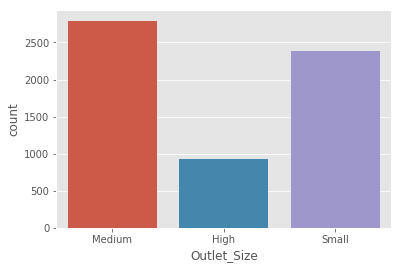

In [12]:
sns.countplot(train.Outlet_Size)

**Observations:**

* ‘LF’, ‘low fat’, and ‘Low Fat’ are the same category and can be combined into one. Similarly we can combine ‘reg’ and ‘Regular’ into one.
* In Outlet_Size’s plot, for 2410 observations, Outlet_Size is blank or missing.
* Some of the items are non-food items, but all the items are categorized either as low fat or regular, which is incorrect. Therefore, we need to assign separate category to non-food items.

### 1.2 Bivariate Analysis

#### 1.2.1 Item_Weight and Item_Outlet_Sales Analysis

Text(0.5, 1.0, 'Item_Weight and Item_Outlet_Sales Analysis')

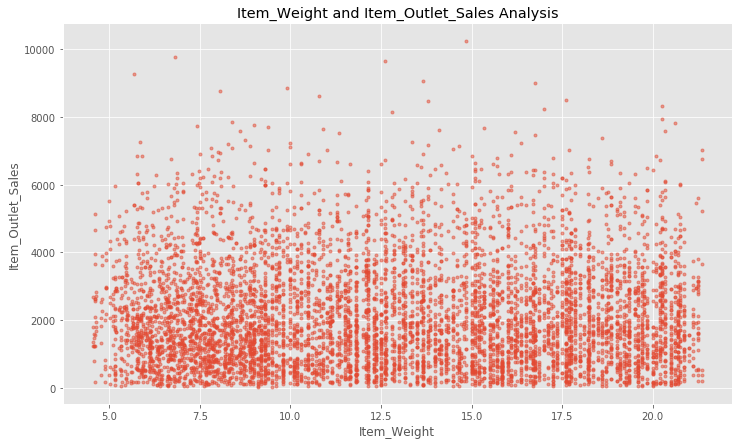

In [13]:
plt.figure(figsize=(12,7))
plt.plot(train.Item_Weight, train.Item_Outlet_Sales,'.', alpha = 0.5)
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")

#### 1.2.2 Item_Visibility and Item_Outlet_Sales Analysis

Text(0.5, 1.0, 'Item_Visibility and Item_Outlet_Sales Analysis')

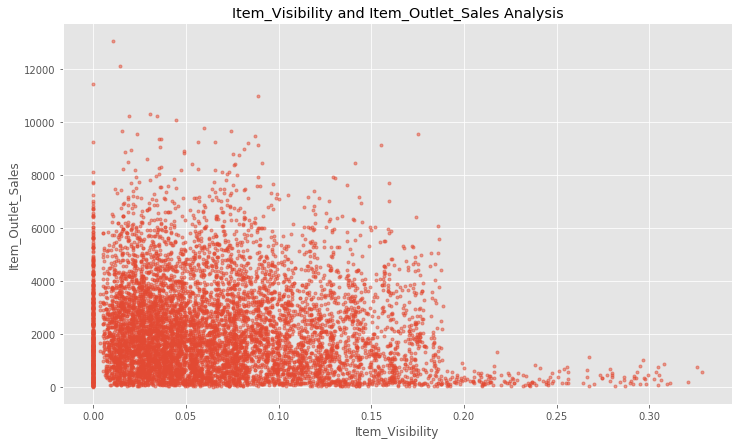

In [14]:
plt.figure(figsize=(12,7))
plt.plot(train.Item_Visibility, train.Item_Outlet_Sales,'.', alpha = 0.5)
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")

#### 1.2.3 Item_MRP and Item_Outlet_Sales Analysis

Text(0.5, 1.0, 'Item_MRP and Item_Outlet_Sales Analysis')

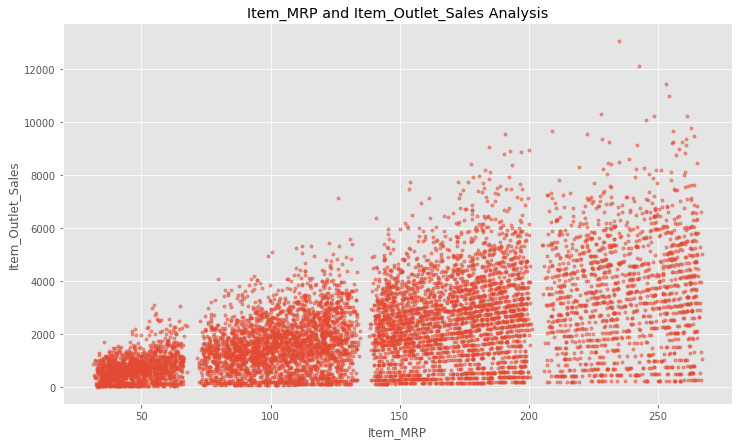

In [15]:
plt.figure(figsize=(12,7))
plt.plot(train.Item_MRP, train.Item_Outlet_Sales,'.', alpha = 0.5)
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_MRP and Item_Outlet_Sales Analysis")

**Observations:**

* No obvious pattern emerges in Item_Weight vs Item_Outlet_Sales plot.
* Item_Visibility vs Item_Outlet_Sales indicates that the more visible a product is the less higher its sales will be. This might be due to the fact that a great number of daily use products, which do not need high visibility, control the top of the sales chart. Furthermore, there is a concerning number of products with visibility zero.
* In the third plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.

#### 1.2.4 Outlet_Type and Item_Outlet_Sales Analysis

Text(0, 0.5, 'Square root of Item_Outlet_Sales')

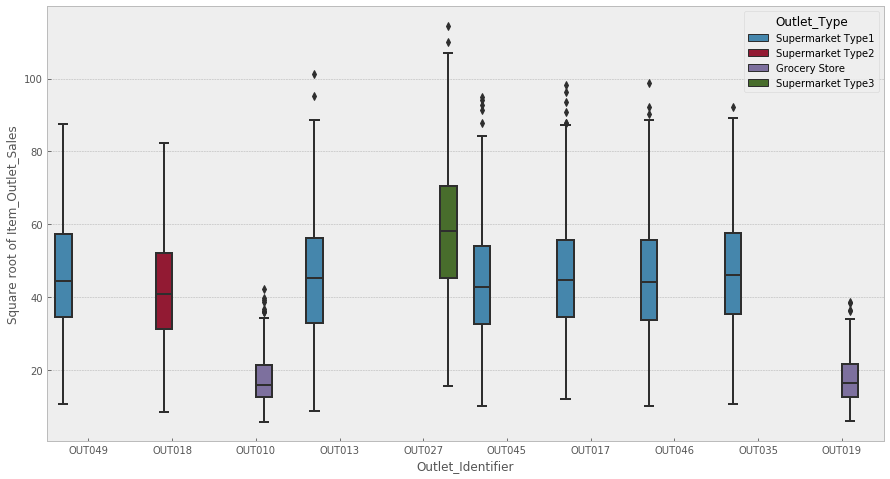

In [16]:
plt.style.use('bmh')
plt.figure(figsize=(15,8))
sns.boxplot(train.Outlet_Identifier, (train.Item_Outlet_Sales)**(1/2), hue = train.Outlet_Type)
plt.xlabel("Outlet_Identifier")
plt.ylabel("Square root of Item_Outlet_Sales")

This box plot shows the relationship between Item Outlet Sales and Outlet Identifier. The items are more frequently bought as outlet size grows, therefore we see that both OUT010 and OUT019 belongs to the grocery store category.

### 2. Data Per-processing

Now, we make certain changes to our dataset from the observations we gather through exploratory data analysis. First, we combine our train and test dataset so that we don't need to do the data cleansing and data manipulation steps twice. After making the desired changes we can split the data again before doing the regression analysis.

In [17]:
train['source']='train'
test['source']='test'

data = pd.concat([train,test], ignore_index = True)
data.to_csv("data.csv",index=False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


#### 2.1 Imputing Missing Weight Values 

In [18]:
#aggfunc is mean by default! Ignores NA by default
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
DRB24                  8.785
DRB25                 12.300
DRB48                 16.750
DRC01                  5.920
DRC12                 17.850
DRC13                  8.260
DRC24                 17.850
DRC25                  5.730
DRC27                 13.800
DRC36                 13.000
DRC49                  8.670
DRD01                 12.100
DRD12                  6.960
DRD13                 15.000
DRD15                 10.600
DRD24                 13.850
DRD25                  6.135
DRD27                 18.750
DRD37                  9.800
DRD49                  9.895
DRD60                 15.700
DRE01                 10.100
DRE03                 19.600
DRE12                  4.590
DRE13                  6.280
...                      ...
NCX05                 15.200
NCX06         

In [19]:
# imputing missing weights on the basis of Item Identifier

def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight

In [20]:
print ('Orignal missing weight values: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final missing weight values: %d'%sum(data['Item_Weight'].isnull()))

Orignal missing weight values: 2439
Final missing weight values: 0


#### 2.2 Imputing Outlet_size with the mode

In [21]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [22]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size

print ('Orignal missing values: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final missing values: %d'%sum(data['Outlet_Size'].isnull()))

Orignal missing values: 4016
Final missing values: 0


#### 2.3 Imputing Item_Visibility

In [23]:
#Get all Item_Visibility mean values for respective Item_Identifier
visibility_item_avg = data.pivot_table(values='Item_Visibility',index='Item_Identifier')

def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility

print ('Original #zeros: %d'%sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final #zeros: %d'%sum(data['Item_Visibility'] == 0))

Original #zeros: 879
Final #zeros: 0


### 3. Feature Engineering

#### 3.1 Determine the years of operation of a store

In [24]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,15
4,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,26


#### 3.2 Create a broad category of Type of Item

In [25]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

#### 3.3 Modify categories of Item_Fat_Content

In [26]:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [27]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

### 4. Feature Transformations

#### 4.1 Creating variable Item_Visibility_MeanRatio

In [28]:
func = lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]
data['Item_Visibility_MeanRatio'] = data.apply(func,axis=1).astype(float)
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years,Item_Type_Combined,Item_Visibility_MeanRatio
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14,Food,0.931078
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,4,Drinks,0.933420
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14,Food,0.960069
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,15,Food,1.000000
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,26,Non-Consumable,1.000000


#### 4.2 Numerical and Categorical Variables – Dummy variables

In [29]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [30]:
#Dummy Variables:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
Item_Visibility_MeanRatio    float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

#### 4.3 Exporting Data

In [31]:
#Drop the columns which have been converted to different types:
columns = ['Item_Type', 'Outlet_Establishment_Year']
data.drop(columns, axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

### 5. Model building and prediction

In [32]:
train_df = pd.read_csv('train_modified.csv')
test_df = pd.read_csv('test_modified.csv')

In [33]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn.model_selection import cross_val_score
from sklearn import metrics

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.41 | Min - 1075 | Max - 1210


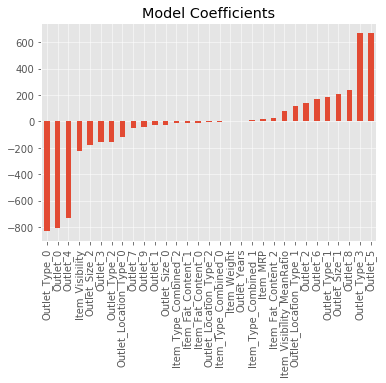

In [34]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

predictors = train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')

coef1 = pd.Series(LR.coef_, predictors).sort_values()
plt.style.use('ggplot')
coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1129
CV Score : Mean - 1130 | Std - 44.6 | Min - 1076 | Max - 1217


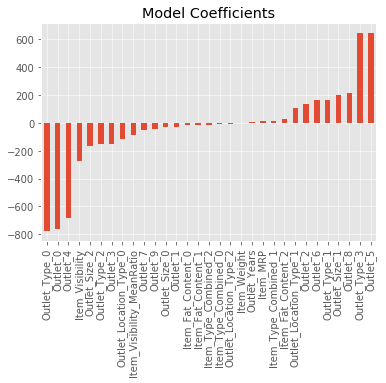

In [35]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
modelfit(RR, train_df, test_df, predictors, target, IDcol, 'RR.csv')

coef2 = pd.Series(RR.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1058
CV Score : Mean - 1091 | Std - 45.42 | Min - 1003 | Max - 1186


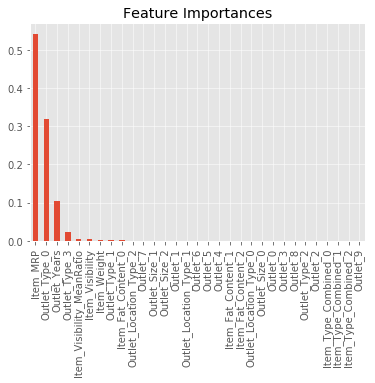

In [36]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_df, test_df, predictors, target, IDcol, 'DT.csv')

coef3 = pd.Series(DT.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1069
CV Score : Mean - 1097 | Std - 43.41 | Min - 1028 | Max - 1180


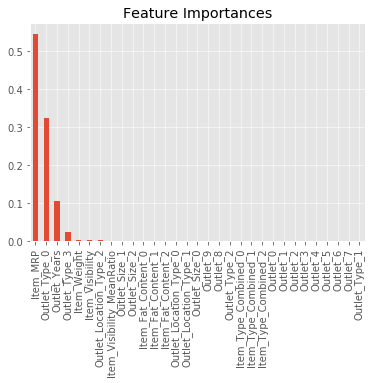

In [37]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_df, test_df, predictors, target, IDcol, 'RF.csv')

coef4 = pd.Series(RF.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

In [38]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_df[predictors], train_df[target], early_stopping_rounds=5, 
             eval_set=[(test_df[predictors], test_df[target])], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [39]:
#Predict training set:
train_df_predictions = my_model.predict(train_df[predictors])

# make predictions
predictions = my_model.predict(test_df[predictors])

In [40]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))

Mean Absolute Error : 129.90780382232222
RMSE : 1052


In [ ]:
IDcol.append(target)
    submission = pd.DataFrame({ x: test_df[x] for x in IDcol})
    submission.to_csv("XGboost.csv", index=False)